In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Start with importing the data and taking a peek...

In [2]:
credit_fraud = pd.read_csv('creditcard.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_fraud.shape

(284807, 31)

So apparently, this data has already been PCA'd and the feartures are now anonymous except for time, amount, and class (normal/not fraud and fraud). 

I'm going to look at the the counts. It's supposed to be really skewed towards the normal/not fraud category. 

0    284315
1       492
Name: Class, dtype: int64


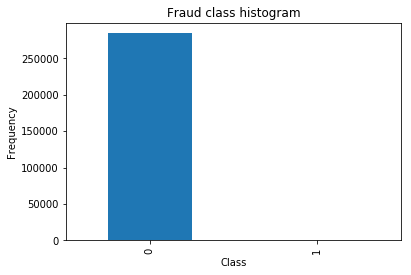

In [5]:
count_classes = pd.value_counts(credit_fraud['Class'], sort = True).sort_index()

# count_classes = pd.value_counts(credit_fraud['Class'])
print(count_classes)

count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

And it is VERY, VERY skewed... 

I'm going to address this skewedness by undersampling the non-fraud data points. But first, I'm going to normalize the amount column and drop the time column.

In [6]:
from sklearn.preprocessing import StandardScaler

credit_fraud['normAmount'] = StandardScaler().fit_transform(credit_fraud['Amount'].values.reshape(-1, 1))
credit_fraud = credit_fraud.drop(['Time','Amount'],axis=1)
credit_fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Undersampling the non-fraud data:

In [7]:
# Getting the two data frames

X = credit_fraud.loc[:, credit_fraud.columns != 'Class']
y = credit_fraud.loc[:, credit_fraud.columns == 'Class']

In [8]:
# Number of data points in the minority class
number_records_fraud = len(credit_fraud[credit_fraud.Class == 1])

# Getting the index numbers of all the fraud data points
fraud_indices = np.array(credit_fraud[credit_fraud.Class == 1].index)

# Picking the indices of the normal/non-fraud classes
normal_indices = credit_fraud[credit_fraud.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Use the indices to under sample dataset
under_sample_data = credit_fraud.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


Now, I'm going to break it up into training and testing sets. The test size will be 30% of the entire set and the training size will be 70%.

In [9]:
from sklearn.cross_validation import train_test_split

# Splitting the whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Splitting the undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

So this next section, he is trying to find the best C value for the Logistic Regression. He is using a function to go through 5 different values: 0.01, 0.1, 1, 10, and 100. 

In [11]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]
    
    # Create a data frame with an

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            # What is the C parameter and the penalty again?
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the 
            # fold to train the model with indices[0]. We then predict on the portion assigned 
            # as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing 
            # the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    # This finds the best C value by using idxmax function to get the index of the highest 
    # mean recall score and the C_parameter column
    
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [12]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.931506849315
Iteration  2 : recall score =  0.917808219178
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.972972972973
Iteration  5 : recall score =  0.954545454545

Mean recall score  0.955366699202

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.86301369863
Iteration  3 : recall score =  0.966101694915
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.909090909091

Mean recall score  0.906693463415

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.86301369863
Iteration  2 : recall score =  0.904109589041
Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall s

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:40: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Iteration  3 : recall score =  0.983050847458
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.924242424242

Mean recall score  0.924072501063

*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
*********************************************************************************


Just using the below to find what all of these functions do... 

KFold creates indices that I can then use with an indexer to create training and testing sets

In [13]:
print(KFold(len(y_train_undersample),5,shuffle=False))

sklearn.cross_validation.KFold(n=688, n_folds=5, shuffle=False, random_state=None)


In [14]:
c_param_range = [0.01,0.1,1,10,100]

# Not sure what the index parameter does... right now range(len(c_param_range),2) gives me []
# And when I take it out completely, it still works... so not sure why index = [] was
# Necessary...

results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])

# Fills in C_parameter column with c_param_range numbers

results_table['C_parameter'] = c_param_range

print(results_table)

   C_parameter Mean recall score
0         0.01               NaN
1         0.10               NaN
2         1.00               NaN
3        10.00               NaN
4       100.00               NaN


In [15]:
results_table.index

RangeIndex(start=0, stop=5, step=1)

In [16]:
# So KFold creates different groups of index numbers. In this case it took the number of rows
# possible and then broke it up into 5 groups. It then takes out each group one at a time to 
# serve as the test group and combines the remaining groups into a bigger group that serves
# as the training group. When it is done doing it's work, you will have 5 sets of different
# test/train group pairings.

fold = KFold(len(y_train_undersample),5,shuffle=False)
fold_list = list(enumerate(fold,start=1))

In [17]:
fold_list

[(1, (array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
          151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
          164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
          177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
          190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
          203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
          216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
          229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
          242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
          255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
          268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
          281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
          294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
          307, 308, 30

In [18]:
# the values.ravel() function takes a column and turns it into an array... 

y_train_undersample.iloc[fold_list[0][1][0],:].values.ravel()

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0,

Here is a function to make a confusion matrix plot...

In [19]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    # Despite putting this 'if normalize' conditionial statement
    # it never got used. But if he ever did call it though, it but it does
    # normalize the data if he set normal = true in the arguments of the
    # function I when called.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)
    
    # This part just writes the amounts inside each box, changing the text color for
    # each box depending on the threshold

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Here it is with the train set data... recall score is 94%

Recall metric in the testing dataset:  0.938775510204


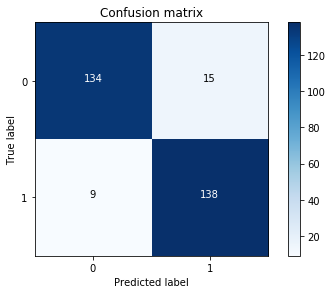

In [20]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [40]:
# I just want to see what this np.newaxis thing does...

# Here is the confusion matrix
print(cnf_matrix, '\n')

# Here it changed the ints into floats
print(cnf_matrix.astype('float'), '\n') 

# This added the columns together 
print(cnf_matrix.sum(axis= 0), '\n')

# This added the rows together
print(cnf_matrix.sum(axis= 1), '\n')

# This took the added up rows and turned it into a one column scalar to be used 
# for whatever mathmatical operation you want with a DF with similar dimensions.
print(cnf_matrix.sum(axis=1)[:, np.newaxis], '\n')


# Used the new axis to divide the matrix that had the floats in it...
print(cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis], '\n')

# This gets the biggest value in the confusion matrix
print(cnf_matrix.max(), '\n')

print(cnf_matrix.shape)
print(range(cnf_matrix.shape[0]))

# intertools.product sort of works like FOIL... creating an array of tuples  
# that can be used in a loop
print(list(itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1]))))

print(list(itertools.product( (0,1), (0,1,1))))

[[74635 10661]
 [   11   136]] 

[[  7.46e+04   1.07e+04]
 [  1.10e+01   1.36e+02]] 

[74646 10797] 

[85296   147] 

[[85296]
 [  147]] 

[[ 0.88  0.12]
 [ 0.07  0.93]] 

74635 

(2, 2)
range(0, 2)
[(0, 0), (0, 1), (1, 0), (1, 1)]
[(0, 0), (0, 1), (0, 1), (1, 0), (1, 1), (1, 1)]


Here it is with the test data... score is 93%

Recall metric in the testing dataset:  0.925170068027


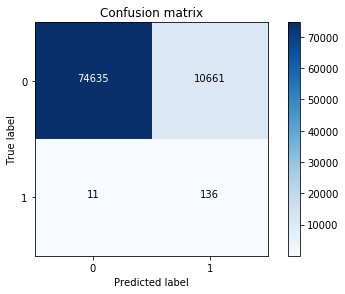

In [21]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Still pretty new to this one... not sure what's going on exactly... 

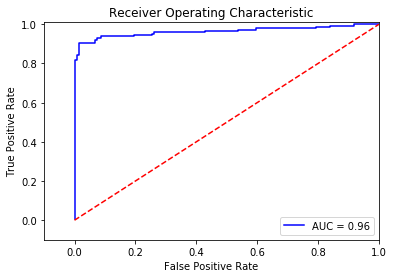

In [44]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
print(y_pred_undersample_score)

[-0.15 -0.23  6.5  -0.31 -0.84  4.51  1.66 -0.39 -0.43  0.29  0.57 -0.4
  7.09  5.31  0.3   3.91  0.16 -0.35  3.18  6.92  0.47  0.19  7.04 -0.49
  3.59 -0.9   2.77  1.11 -0.48 -0.49  0.94 -0.22  1.04 -0.08  3.7   3.28
  6.4  -0.54  2.25  3.18  6.48  0.24 -0.53  7.31 -0.4  -0.44  2.62  2.3
  3.57 -0.43 -0.12  0.94 -0.52 -0.33  1.61  3.69 -0.48 -0.48  1.42  3.39
  3.2  -0.47  2.49 -0.47 -0.54 -0.56  3.89 -0.47 -0.42 -0.35 -0.68 -0.53
  0.19  0.11 -0.28  5.77 -0.57  1.43  3.32 -0.45  1.88 -0.29  0.91  2.31
 -0.02 -0.43  4.14 -0.17  4.87 -0.25 -0.3  -0.62 -0.38 -0.05  4.34 -0.14
  3.36 -0.59  2.02 -0.04  3.37  0.66 -0.51 -0.06  1.9  -0.45 -0.37  6.18
 -0.67  1.97  0.04  4.38  4.59  1.14 -0.58 -0.19  2.42 -0.19 -0.93  4.55
  3.87 -0.57 -0.59  3.59  1.75 -0.26 -0.56 -0.56 -0.97 -0.27  1.55 -0.13
  5.38  6.48  6.23  4.4   3.65 -0.17 -0.41  2.09 -0.31 -0.24 -0.53 -0.31
 -0.5   3.18 -0.3  -0.34  0.26  2.12  4.55 -0.6   0.49 -0.18  0.03  1.35
 -0.15 -0.46 -0.28 -0.51 -0.08  1.62  4.54 -0.35  2.4

In [48]:
print(fpr)

[ 0.    0.    0.    0.    0.    0.    0.01  0.01  0.01  0.01  0.07  0.07
  0.07  0.07  0.09  0.09  0.19  0.19  0.26  0.26  0.26  0.26  0.43  0.43
  0.54  0.54  0.6   0.6   0.79  0.79  0.84  0.84  0.92  0.92  1.  ]


In [49]:
print(tpr)

[ 0.01  0.39  0.41  0.44  0.46  0.82  0.82  0.84  0.84  0.9   0.9   0.92
  0.92  0.93  0.93  0.94  0.94  0.95  0.95  0.95  0.95  0.96  0.96  0.97
  0.97  0.97  0.97  0.98  0.98  0.99  0.99  0.99  0.99  1.    1.  ]


In [50]:
print(thresholds)

[ 7.87  3.36  3.36  3.2   3.18  1.11  1.04  0.72  0.69  0.37  0.16  0.12
  0.11  0.07  0.06  0.05 -0.14 -0.15 -0.18 -0.19 -0.19 -0.21 -0.31 -0.31
 -0.38 -0.38 -0.4  -0.4  -0.5  -0.51 -0.54 -0.54 -0.58 -0.59 -0.97]
